<a href="https://colab.research.google.com/github/arifanf/MSIB21/blob/main/D48_English_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 48 - Rabu, 27 Oktober 2021

# Extractive Text Summarization

Source : [Youtube](https://youtu.be/9PoKellNrBc)

*Pada local computer*

In [1]:
#Lakukan install modul spacy pada cmd:
#Buka command prompt dengan klik kanan administrator previlege (Run as administrator).
#Gunakan direktori C:\
#ketik : conda install -c conda-forge spacy
#ketik : python -m spacy download en

In [2]:
# Import library Spacy, library untuk melakukan proses yang ada di dalam domain nlp

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [3]:
# Memasukkan daftar stopword ke dalam variabel stopwords

stopwords = list(STOP_WORDS)
stopwords

['become',
 'twenty',
 'whoever',
 'thus',
 'you',
 'my',
 "'ve",
 'very',
 '‘ll',
 'name',
 'through',
 'someone',
 'above',
 'next',
 'these',
 'your',
 'sixty',
 'so',
 'own',
 'against',
 'he',
 'used',
 'has',
 'then',
 'whence',
 'regarding',
 'without',
 'ca',
 'yet',
 'nobody',
 'not',
 'another',
 'least',
 'much',
 'third',
 'does',
 'across',
 'may',
 'now',
 'seeming',
 'although',
 'that',
 'latterly',
 'same',
 'this',
 're',
 "'m",
 'over',
 'former',
 'else',
 'a',
 'her',
 'with',
 'move',
 'might',
 'hundred',
 'beside',
 'anyway',
 'from',
 'out',
 'further',
 'eleven',
 'for',
 'serious',
 'was',
 'them',
 'bottom',
 'whither',
 'behind',
 'give',
 'together',
 'whole',
 'due',
 'thereby',
 'who',
 "'d",
 'but',
 'few',
 'all',
 "'ll",
 'such',
 'herein',
 'i',
 'him',
 'to',
 'latter',
 'fifty',
 'would',
 'himself',
 'within',
 'either',
 'an',
 'hence',
 'where',
 "n't",
 'how',
 'hereafter',
 'mine',
 'nothing',
 'during',
 'top',
 'became',
 'mostly',
 'his',
 

In [4]:
# Mengambil komponen - komponen pada Spacy seperti:
# tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer

nlp = spacy.load('en_core_web_sm')
nlp

There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.

In [5]:
# Imput teks di atas disini

text = """ There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. 
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary. 
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.
"""

In [6]:
text

' There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. \nAn example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is sum

# Proses 1 (Tokenization)

In [7]:
# Membuat objek iterable (bisa dilakukan iterasi) dari teks

doc = nlp(text)
doc

 There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. 
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summa

In [8]:
# Membuat token dari teks

tokens = [token.text for token in doc]
tokens

[' ',
 'There',
 'are',
 'broadly',
 'two',
 'types',
 'of',
 'extractive',
 'summarization',
 'tasks',
 'depending',
 'on',
 'what',
 'the',
 'summarization',
 'program',
 'focuses',
 'on',
 '.',
 'The',
 'first',
 'is',
 'generic',
 'summarization',
 ',',
 'which',
 'focuses',
 'on',
 'obtaining',
 'a',
 'generic',
 'summary',
 'or',
 'abstract',
 'of',
 'the',
 'collection',
 '(',
 'whether',
 'documents',
 ',',
 'or',
 'sets',
 'of',
 'images',
 ',',
 'or',
 'videos',
 ',',
 'news',
 'stories',
 'etc',
 '.',
 ')',
 '.',
 'The',
 'second',
 'is',
 'query',
 'relevant',
 'summarization',
 ',',
 'sometimes',
 'called',
 'query',
 '-',
 'based',
 'summarization',
 ',',
 'which',
 'summarizes',
 'objects',
 'specific',
 'to',
 'a',
 'query',
 '.',
 'Summarization',
 'systems',
 'are',
 'able',
 'to',
 'create',
 'both',
 'query',
 'relevant',
 'text',
 'summaries',
 'and',
 'generic',
 'machine',
 '-',
 'generated',
 'summaries',
 'depending',
 'on',
 'what',
 'the',
 'user',
 'needs',


# Proses 2 (Text cleaning)

In [9]:
# Punctuation = karakter khusus, karakter ini akan dihilangkan dari teks

punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

# Proses 3 ( Word-frequency table )

In [10]:
word_frequencies = {}

for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1



In [11]:
word_frequencies


{' ': 1,
 'Image': 1,
 'Imagine': 1,
 'Similarly': 1,
 'Summarization': 1,
 'Video': 1,
 'able': 1,
 'abstract': 2,
 'actions': 1,
 'activity': 1,
 'application': 2,
 'applications': 1,
 'articles': 3,
 'attempts': 1,
 'automatic': 1,
 'automatically': 3,
 'based': 1,
 'boring': 2,
 'broadly': 1,
 'called': 2,
 'captured': 1,
 'cluster': 1,
 'collection': 3,
 'concisely': 1,
 'consists': 1,
 'consumer': 1,
 'context': 1,
 'create': 1,
 'creates': 1,
 'depending': 2,
 'document': 4,
 'documents': 2,
 'domain': 1,
 'etc': 1,
 'example': 3,
 'exploration': 1,
 'extract': 1,
 'extractive': 1,
 'focuses': 2,
 'frames': 1,
 'generated': 1,
 'generating': 1,
 'generic': 3,
 'given': 2,
 'ignoring': 1,
 'image': 1,
 'images': 3,
 'images.[3': 1,
 'important': 1,
 'interested': 1,
 'larger': 1,
 'latest': 1,
 'long': 1,
 'machine': 1,
 'multi': 1,
 'multiple': 1,
 'needs': 1,
 'news': 4,
 'objects': 1,
 'obtaining': 1,
 'personal': 1,
 'problem': 2,
 'produce': 1,
 'program': 1,
 'pulls': 1,
 '

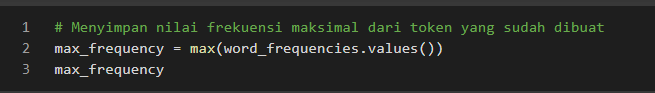

In [12]:
# Menyimpan nilai frekuensi maksimal dari token yang sudah dibuat

max_frequency = max(word_frequencies.values())
max_frequency

11

In [13]:
min_frequency = min(word_frequencies.values())
min_frequency

1

In [14]:
# Menghitung skor

for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency

word_frequencies

{' ': 0.09090909090909091,
 'Image': 0.09090909090909091,
 'Imagine': 0.09090909090909091,
 'Similarly': 0.09090909090909091,
 'Summarization': 0.09090909090909091,
 'Video': 0.09090909090909091,
 'able': 0.09090909090909091,
 'abstract': 0.18181818181818182,
 'actions': 0.09090909090909091,
 'activity': 0.09090909090909091,
 'application': 0.18181818181818182,
 'applications': 0.09090909090909091,
 'articles': 0.2727272727272727,
 'attempts': 0.09090909090909091,
 'automatic': 0.09090909090909091,
 'automatically': 0.2727272727272727,
 'based': 0.09090909090909091,
 'boring': 0.18181818181818182,
 'broadly': 0.09090909090909091,
 'called': 0.18181818181818182,
 'captured': 0.09090909090909091,
 'cluster': 0.09090909090909091,
 'collection': 0.2727272727272727,
 'concisely': 0.09090909090909091,
 'consists': 0.09090909090909091,
 'consumer': 0.09090909090909091,
 'context': 0.09090909090909091,
 'create': 0.09090909090909091,
 'creates': 0.09090909090909091,
 'depending': 0.18181818181

In [15]:
sentence_tokens = [sent for sent in doc.sents]
sentence_tokens

[ There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. ,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic).,
 This problem is called multi-document summarization.,
 A related appli

In [16]:
# Mengisi skor untuk setiap kalimat

sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]


sentence_scores

{ There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.: 2.909090909090909,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).: 3.9999999999999987,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.: 3.909090909090909,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. : 3.09090909090909,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.: 3.9999999999999996,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of artic

# Proses 4 : End Process (Summarization)

[heapq](https://docs.python.org/3/library/heapq.html)

In [17]:
# Import library nlargest untuk mengurutkan dan mengambil n nilai terbesar dari list.

from heapq import nlargest

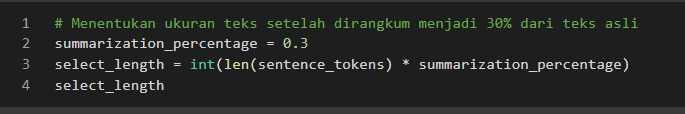

In [18]:
# Menentukan ukuran teks setelah dirangkum menjadi 30% dari teks asli

summarization_percentage = 0.3
select_lenght = int(len(sentence_tokens) * summarization_percentage)
select_lenght

4

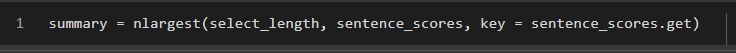

In [19]:
summary = nlargest(select_lenght, sentence_scores, key = sentence_scores.get)

In [20]:
summary

[An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. ]

In [21]:
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

In [22]:
print(f"Jumlah kata sebelum dirangkum : {len(text)}")
print(f"Jumlah kata setelah dirangkum : {len(summary)}")

Jumlah kata sebelum dirangkum : 1871
Jumlah kata setelah dirangkum : 606


In [23]:
text

' There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. \nAn example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is sum

In [24]:
summary

'An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs. \n'